# Setup

In [7]:
# Setup
from src.hys_portal_scraper import Portal_Scraper
from src.scrapers.initiative_scraper import Initiative_Scraper
from src.scrapers.feedback_scraper import Feedback_Scraper
from src.scrapers.attachment_scraper import Attachment_Scraper

from src.database.seedlist_handler import SeedList_Handler

from src.database.database_connection import database_connection
%load_ext autoreload
%autoreload 2



/Users/qbukold/Developer/GitHub/Portal_Scraper/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Initalize Database
Database structure is defined in src/database/database_connection.py

In [6]:
# Only run once. Code creates new Database.
con = database_connection()
Portal_Scraper(con).init_database_session(create_db=True)

NameError: name 'database_connection' is not defined

# Upsert Seedlist to Database
Seedlist is a .txt document with one URL per line. The URL points to the initatives homepage, like <br> "https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/1362-Access-to-Social-Protection_en"

In [13]:
# create Table named Seedlist and fill with initiative_id and more.
con = database_connection()
SeedList_Handler(connection=con).insert_seedlist("data/seedlist_manual_all_140424_additional-Inis.txt")

# Scrape Initiatives and Stage Metadata
Input are all Initative IDs that, according to seedlist are not scraped yet.

In [14]:
'''
1. Scrape all initatives where `initiative_updated` is Null in Seedlist Table
2. Upsert initative metadata in Initatives Table
3. Upsert stage metadata in Stages Table
4. Update 'initiative_updated' in Seedlist with current (GMT) time
'''

con = database_connection()

Initiative_Scraper(connection=con, wait_time=10).scrape_all() # wait_time = time between requests

logging     : INFO     Wait Time set to 10 sec.
logging     : INFO     Scraping 11 Initiatives...
logging     : INFO     ETA 00:01:50
logging     : INFO     Success! Updated Database on Initiative: 12658
logging     : INFO     Success! Updated Database on Initiative: 12733
logging     : INFO     Success! Updated Database on Initiative: 12827
logging     : INFO     Success! Updated Database on Initiative: 13128
logging     : INFO     Success! Updated Database on Initiative: 13169
logging     : INFO     Success! Updated Database on Initiative: 13188
logging     : INFO     Success! Updated Database on Initiative: 13321
logging     : INFO     Success! Updated Database on Initiative: 13488
logging     : INFO     Success! Updated Database on Initiative: 13611
logging     : WARNING  WARNING: No Data Found for 7567585
logging     : WARNING  WARNING: No Data Found for 7567586
logging     : INFO     scraped initiatives 11/11 [✔️ 🎉✨]
logging     : WARNING  2 initatives where not found.


[7567585, 7567586]

published_date
2017-02-28 13:39:01    1
2017-02-28 17:42:30    1
2017-02-28 17:43:30    1
2017-03-02 12:31:00    1
2017-03-06 16:53:30    1
                      ..
2024-03-19 18:08:00    1
2024-03-25 15:44:34    1
2024-03-27 15:48:31    1
2024-03-27 15:49:11    1
2024-04-17 10:49:55    1
Name: count, Length: 1485, dtype: int64

(array([17167., 17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

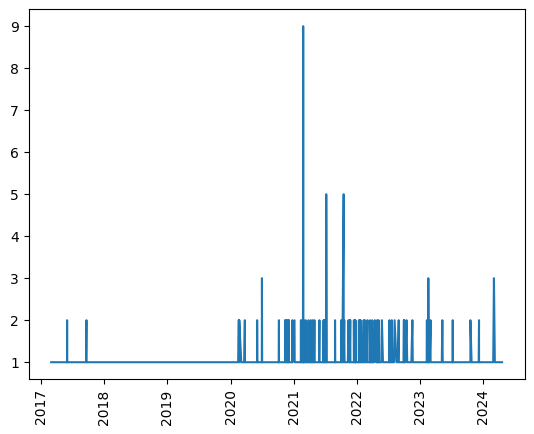

In [22]:
## display stages in DB by Published Date
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from src.database.database_connection import database_connection

engine = create_engine(database_connection(), echo=False, echo_pool=False)

stage_dates_published = pd.read_sql("SELECT published_date FROM stages", engine)

stage_dates_published = stage_dates_published.value_counts("published_date")
stage_dates_published = stage_dates_published.sort_index(ascending=True)
display(stage_dates_published)
plt.plot(stage_dates_published.index, stage_dates_published.values)
plt.xticks(rotation='vertical')

# Scrape Feedbacks and Attachment-Metadata

In [24]:
'''
1. Scrape all Stages where `feedback_updated` is Null in Stages Table
2. Upsert feedbacks to Feedbacks Table
3. Upsert attachment metadata to Attachments Table
4. Update 'feedback_updated' in Stages Table with current time
'''

con = database_connection()
Feedback_Scraper(connection=con, wait_time=10).scrape_all() # wait_time = time between requests

logging     : INFO     gmtime = 2024-05-17 13:32:35
logging     : INFO     Wait Time set to 10 sec.
logging     : INFO     Scraping Feedback of 449 Stages ...

logging     : INFO     Scraping Stage: 111830
logging     : INFO     ETA of Stage-Data 00:00:10
logging     : INFO     Scraped Page 1/1
logging     : INFO     Scraped 1 feedbacks

logging     : INFO     Scraping Stage: 111901
logging     : INFO     ETA of Stage-Data 00:00:20
logging     : INFO     Scraped Page 1/2
logging     : INFO     Scraped Page 2/2
logging     : INFO     Scraped 14 feedbacks

logging     : INFO     Scraping Stage: 113020
logging     : INFO     ETA of Stage-Data 00:00:10
logging     : INFO     Scraped Page 1/1
logging     : INFO     Scraped 1 feedbacks

logging     : INFO     Scraping Stage: 5505620
logging     : INFO     ETA of Stage-Data 00:00:10
logging     : INFO     Scraped Page 1/1
logging     : INFO     Scraped 1 feedbacks

logging     : INFO     Scraping Stage: 123606
logging     : INFO     ETA of St

AttributeError: 'tuple' object has no attribute 'tb_frame'

# Scrape Attachments

In [ ]:
con = database_connection()
Attachment_Scraper(con, 5).scrape_all()